# TAREA N°3 
Se sabe poco sobre los factores socio-economicos que influyen en el número de muertes por COVID en Chile.

Ahora, su tarea es construir un modelo de regresión en Python para predecir "muertes por covid" teniendo en cuenta el HDI de la comuna, y el número de vacunas administradas. Es decir, su modelo solo tiene que tomar datos desde después del 24 de diciembre de 2020, que es cuando empezamos a administrar vacunas.
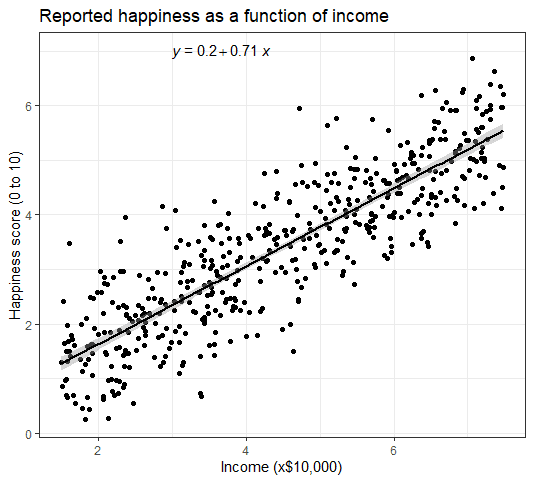

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import numpy as np

In [20]:
hdi = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
vac = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis.csv')
falle = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto84/fallecidos_comuna_edad_totales.csv')

# Pre-proceso y limpieza de datos

In [9]:
hdi.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [12]:
hdi2 = hdi[['comuna', 'HDI']].copy()
hdi2.head()

,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [13]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,577.0,191.0,1.0,619.0,1054.0,1349.0,1513.0,1508.0,458.0,2.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,3.0,16.0,5.0,3.0,1.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,0.0,7.0,4.0,3.0,5.0,7.0,1.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
vac2 = vac[vac['Codigo region'] == 13]
vac2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,104.0,1.0,0.0,79.0,71.0,66.0,52.0,61.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,232.0,143.0,1.0,383.0,460.0,514.0,638.0,433.0,10.0,1.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,75.0,9.0,2.0,129.0,73.0,112.0,133.0,123.0,9.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,197.0,117.0,6.0,202.0,242.0,354.0,365.0,190.0,161.0,9.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,365.0,384.0,30.0,441.0,454.0,485.0,505.0,499.0,304.0,132.0


In [32]:
vac2.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       ...
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11'],
      dtype='object', length=205)

In [33]:
falle2.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Edad',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       ...
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07'],
      dtype='object', length=484)

Se puede visualizar como en la base de datos de fallecidos la ultima fecha sera menos actual que en vac2, por lo que ajustaremos la fecha de vac2 para no distorsionar los datos.

In [34]:
vac3 = vac2.dropna().copy()
vac3['Vacunados'] = vac3.iloc[:, 5:-5].sum(axis = 1)
vac4 = vac3[['Codigo comuna', 'Poblacion', 'Vacunados']].sort_values(['Codigo comuna']).copy()
vac4.head()

,Codigo comuna,Poblacion,Vacunados
136,13101.0,503147.0,255294.0
91,13102.0,88956.0,41657.0
92,13103.0,142465.0,58241.0
94,13104.0,139195.0,76917.0
96,13105.0,172000.0,78692.0


In [35]:
for i in vac4:
    vac4[i] = vac4[i].astype('int64')
vac4.head()


,Codigo comuna,Poblacion,Vacunados
136,13101,503147,255294
91,13102,88956,41657
92,13103,142465,58241
94,13104,139195,76917
96,13105,172000,78692


In [36]:
vac_final = vac4.copy()
vac_final['Porcentaje'] = vac_final['Vacunados']/vac_final['Poblacion']
vac_final.head()

,Codigo comuna,Poblacion,Vacunados,Porcentaje
136,13101,503147,255294,0.507394
91,13102,88956,41657,0.468288
92,13103,142465,58241,0.408809
94,13104,139195,76917,0.552585
96,13105,172000,78692,0.457512


In [37]:
falle.head()

,Region,Codigo region,Comuna,Codigo comuna,Edad,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
0,Antofagasta,2,Antofagasta,2101,<=39,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Antofagasta,2,Antofagasta,2101,40-49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Antofagasta,2,Antofagasta,2101,50-59,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Antofagasta,2,Antofagasta,2101,60-69,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Antofagasta,2,Antofagasta,2101,70-79,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
falle2 = falle[falle['Codigo region'] == 13]
falle2.head()

,Region,Codigo region,Comuna,Codigo comuna,Edad,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
1596,Metropolitana,13,Alhue,13502,<=39,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,Metropolitana,13,Alhue,13502,40-49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,Metropolitana,13,Alhue,13502,50-59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,Metropolitana,13,Alhue,13502,60-69,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,Metropolitana,13,Alhue,13502,70-79,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
falle3 = falle2.dropna().copy()
falle3.columns.get_loc("2020-12-24")

288

Esta es la fecha en la cual que se comenzo a administrar vacunas, desde este indice comienza el analisis.

In [59]:
falle3['Fallecidos'] = falle3.iloc[:, 288:-1].sum(axis = 1)
falle4 = falle3[['Codigo comuna', 'Edad', 'Fallecidos']].sort_values(['Codigo comuna']).copy()
falle4.head()

,Codigo comuna,Edad,Fallecidos
1938,13101,>=90,27.0
1937,13101,80-89,66.0
1936,13101,70-79,83.0
1935,13101,60-69,54.0
1934,13101,50-59,38.0


In [60]:
falle5 = falle4.groupby('Codigo comuna').sum().reset_index()
falle5.head()

,Codigo comuna,Fallecidos
0,13101,304.0
1,13102,102.0
2,13103,261.0
3,13104,214.0
4,13105,251.0


In [61]:
falle5 = falle5.rename(columns = {'Codigo comuna':'COMUNA'})
vac_final = vac_final.rename(columns = {'Codigo comuna':'COMUNA'})
union = pd.merge(vac_final, falle5, on='COMUNA')
union.head()

,COMUNA,Poblacion,Vacunados,Porcentaje,Fallecidos
0,13101,503147,255294,0.507394,304.0
1,13102,88956,41657,0.468288,102.0
2,13103,142465,58241,0.408809,261.0
3,13104,139195,76917,0.552585,214.0
4,13105,172000,78692,0.457512,251.0


In [148]:
hdi2 = hdi2.rename(columns = {'comuna':'COMUNA'})
master_total = pd.merge(hdi2, union, on='COMUNA')
master_total.head()

,COMUNA,HDI,Poblacion,Vacunados,Porcentaje,Fallecidos
0,13101,0.861222,503147,255294,0.507394,304.0
1,13102,0.764616,88956,41657,0.468288,102.0
2,13103,0.718874,142465,58241,0.408809,261.0
3,13104,0.749584,139195,76917,0.552585,214.0
4,13105,0.742015,172000,78692,0.457512,251.0


Estos son los totales, a la fecha de 2021-07-07, de vacunados y fallecidos por comuna (Lamentablemente me di cuenta tarde que no era lo que se pedia).

Ahora se procedera a agruparlos por semana.

In [71]:
falle_sem = falle3.iloc[:, 288:-1]
falle_sem.insert(0, "COMUNA", falle3['Codigo comuna'], True)
falle_sem.head()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
1596,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,13502,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
vac_sem = vac2.iloc[:, 5:-4]
vac_sem.insert(0, "COMUNA", vac2['Codigo comuna'], True)
vac_sem.head()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
88,13502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,79.0,120.0,104.0,1.0,0.0,79.0,71.0,66.0
89,13402.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,717.0,1079.0,432.0,232.0,143.0,1.0,383.0,460.0,514.0
90,13403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,263.0,171.0,122.0,75.0,9.0,2.0,129.0,73.0,112.0
91,13102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,481.0,562.0,360.0,197.0,117.0,6.0,202.0,242.0,354.0
92,13103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.0,997.0,834.0,577.0,365.0,384.0,30.0,441.0,454.0,485.0


In [75]:
vac_sem.isna().any()

COMUNA        True
2020-12-24    True
2020-12-25    True
2020-12-26    True
2020-12-27    True
              ... 
2021-07-03    True
2021-07-04    True
2021-07-05    True
2021-07-06    True
2021-07-07    True
Length: 197, dtype: bool

In [78]:
vac_sem.tail()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
136,13101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,3299.0,2290.0,1686.0,915.0,503.0,47.0,776.0,639.0,860.0
137,13601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,699.0,444.0,314.0,311.0,213.0,4.0,303.0,250.0,290.0
138,13303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,144.0,141.0,91.0,52.0,2.0,0.0,45.0,30.0,42.0
139,13132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1133.0,677.0,466.0,606.0,121.0,5.0,404.0,357.0,385.0
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
vac_sem2 = vac_sem.copy()
vac_sem2.drop(vac_sem2.tail(1).index, inplace=True)
vac_sem2.tail()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
135,13131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,289.0,795.0,516.0,292.0,203.0,98.0,87.0,185.0,156.0,145.0
136,13101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,3299.0,2290.0,1686.0,915.0,503.0,47.0,776.0,639.0,860.0
137,13601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,699.0,444.0,314.0,311.0,213.0,4.0,303.0,250.0,290.0
138,13303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,144.0,141.0,91.0,52.0,2.0,0.0,45.0,30.0,42.0
139,13132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1133.0,677.0,466.0,606.0,121.0,5.0,404.0,357.0,385.0


In [81]:
falle_sem.isna().any()

COMUNA        False
2020-12-24    False
2020-12-25    False
2020-12-26    False
2020-12-27    False
              ...  
2021-07-03    False
2021-07-04    False
2021-07-05    False
2021-07-06    False
2021-07-07    False
Length: 197, dtype: bool

In [84]:
len(vac_sem2.index)

52

In [82]:
len(falle_sem.index)

364

Aca se puede observar como los datos no estan agrupados por comuna.

In [85]:
falle_sem2 = falle_sem.groupby('COMUNA').sum().reset_index()
len(falle_sem2.index)

52

En este punto 

En este punto tenemos el numero de vacunados y fallecidos diarios, ambos diferenciados por comuna y con un rango desde 2020-12-24 al 2021-07-07. 

La existencia 197 columnas, 52 filas y la inexistencia de NaN en ambos nos confirma que podemos proceder a separar por semanas.

Sabemos que tenemos 196 columnas pertenecientes a fechas, lo que convenientemente nos otorgara 28 semanas exactas y facilitara la segmentacion.

In [118]:
falle_sem_fin = falle_sem2.copy()
inferior = 1
semana = 1
cuenta = 1
for u in range(1,197):
    if cuenta == 7:
        superior = u
        falle_sem_fin[str(semana)] = falle_sem_fin.iloc[:, inferior:superior].sum(axis = 1)
        
        inferior = superior + 1
        semana += 1
        cuenta = 0
    
    cuenta+=1

falle_sem_fin.head()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,19,20,21,22,23,24,25,26,27,28
0,13101,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,13102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,13103,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,13104,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,13105,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


In [119]:
falle_sem_fin2 = falle_sem_fin.iloc[:, -28:]
falle_sem_fin2.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,3.0,4.0,2.0,8.0,9.0,8.0,8.0,12.0,9.0,5.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,1.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,5.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,3.0,5.0,5.0,3.0,5.0,2.0,7.0,6.0,5.0,4.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,3.0,1.0,1.0,5.0,4.0,4.0,5.0,7.0,4.0,6.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,2.0,4.0,2.0,7.0,8.0,5.0,7.0,6.0,6.0,1.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


In [120]:
fallecidos = falle_sem_fin2.copy()
fallecidos.insert(0, "COMUNA", falle_sem_fin['COMUNA'], True)
fallecidos.head()

,COMUNA,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,13101,3.0,4.0,2.0,8.0,9.0,8.0,8.0,12.0,9.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,13102,1.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,13103,3.0,5.0,5.0,3.0,5.0,2.0,7.0,6.0,5.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,13104,3.0,1.0,1.0,5.0,4.0,4.0,5.0,7.0,4.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,13105,2.0,4.0,2.0,7.0,8.0,5.0,7.0,6.0,6.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


Se repite el proceso para la base de datos perteneciente a vacunados.

In [121]:
vac_sem_fin = vac_sem2.copy()
inferior = 1
semana = 1
cuenta = 1
for u in range(1,197):
    if cuenta == 7:
        superior = u
        vac_sem_fin[str(semana)] = vac_sem_fin.iloc[:, inferior:superior].sum(axis = 1)
        
        inferior = superior + 1
        semana += 1
        cuenta = 0
    
    cuenta+=1

vac_sem_fin.head()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,19,20,21,22,23,24,25,26,27,28
88,13502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,151.0,162.0,77.0,102.0,242.0,281.0,295.0,304.0,375.0
89,13402.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.0,1541.0,1154.0,901.0,1292.0,2271.0,3849.0,2523.0,2551.0,1651.0
90,13403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,661.0,607.0,393.0,487.0,454.0,634.0,746.0,536.0,709.0,410.0
91,13102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1253.0,1431.0,1002.0,686.0,601.0,1354.0,1628.0,1343.0,1631.0,1124.0
92,13103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1659.0,2077.0,1640.0,1667.0,1394.0,1844.0,1981.0,2707.0,3379.0,2251.0


In [122]:
vac_sem_fin2 = vac_sem_fin.iloc[:, -28:]
vac_sem_fin2.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,151.0,162.0,77.0,102.0,242.0,281.0,295.0,304.0,375.0
89,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,197.0,...,1828.0,1541.0,1154.0,901.0,1292.0,2271.0,3849.0,2523.0,2551.0,1651.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,661.0,607.0,393.0,487.0,454.0,634.0,746.0,536.0,709.0,410.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,1253.0,1431.0,1002.0,686.0,601.0,1354.0,1628.0,1343.0,1631.0,1124.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,...,1659.0,2077.0,1640.0,1667.0,1394.0,1844.0,1981.0,2707.0,3379.0,2251.0


In [123]:
vacunados = vac_sem_fin2.copy()
vacunados.insert(0, "COMUNA", vac_sem_fin['COMUNA'], True)
vacunados = vacunados.sort_values(['COMUNA'])
vacunados.head()

,COMUNA,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
136,13101.0,0.0,0.0,0.0,840.0,3.0,0.0,55.0,36.0,0.0,...,9662.0,9404.0,5363.0,3868.0,4367.0,9065.0,11812.0,7514.0,9523.0,4566.0
91,13102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1253.0,1431.0,1002.0,686.0,601.0,1354.0,1628.0,1343.0,1631.0,1124.0
92,13103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1659.0,2077.0,1640.0,1667.0,1394.0,1844.0,1981.0,2707.0,3379.0,2251.0
94,13104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2730.0,2466.0,2089.0,2352.0,1815.0,2795.0,2524.0,2000.0,3277.0,1754.0
96,13105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2425.0,2758.0,1715.0,1298.0,1162.0,2510.0,3329.0,3778.0,4460.0,1851.0


In [124]:
fallecidos.head()

,COMUNA,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,13101,3.0,4.0,2.0,8.0,9.0,8.0,8.0,12.0,9.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,13102,1.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,13103,3.0,5.0,5.0,3.0,5.0,2.0,7.0,6.0,5.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,13104,3.0,1.0,1.0,5.0,4.0,4.0,5.0,7.0,4.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,13105,2.0,4.0,2.0,7.0,8.0,5.0,7.0,6.0,6.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


In [125]:
len(vacunados.index)

52

In [126]:
len(fallecidos.index)

52

In [127]:
len(hdi2)

52

In [140]:
vals = list(fallecidos.columns)[1:29]
ids = list(fallecidos.columns)[0]
fallecidos2 = pd.melt(fallecidos, value_vars=vals, id_vars=ids)
fallecidos2

,COMUNA,variable,value
0,13101,1,3.0
1,13102,1,1.0
2,13103,1,3.0
3,13104,1,3.0
4,13105,1,2.0
...,...,...,...
1451,13601,28,10.0
1452,13602,28,3.0
1453,13603,28,3.0
1454,13604,28,4.0


In [141]:
vacunados2 = pd.melt(vacunados, value_vars=vals, id_vars=ids)
vacunados2

,COMUNA,variable,value
0,13101.0,1,0.0
1,13102.0,1,0.0
2,13103.0,1,0.0
3,13104.0,1,0.0
4,13105.0,1,0.0
...,...,...,...
1451,13601.0,28,1395.0
1452,13602.0,28,505.0
1453,13603.0,28,508.0
1454,13604.0,28,1242.0


In [146]:
fallecidos2 = fallecidos2.rename(columns = {'COMUNA':'Comuna', 'variable':'Semana', 'value':'Fallecidos'})
fallecidos2

,Comuna,Semana,Fallecidos
0,13101,1,3.0
1,13102,1,1.0
2,13103,1,3.0
3,13104,1,3.0
4,13105,1,2.0
...,...,...,...
1451,13601,28,10.0
1452,13602,28,3.0
1453,13603,28,3.0
1454,13604,28,4.0


In [147]:
vacunados2 = vacunados2.rename(columns = {'COMUNA':'Comuna', 'variable':'Semana', 'value':'Vacunados'})
vacunados2

,Comuna,Semana,Vacunados
0,13101.0,1,0.0
1,13102.0,1,0.0
2,13103.0,1,0.0
3,13104.0,1,0.0
4,13105.0,1,0.0
...,...,...,...
1451,13601.0,28,1395.0
1452,13602.0,28,505.0
1453,13603.0,28,508.0
1454,13604.0,28,1242.0


In [159]:
master_semanal = pd.merge(vacunados2, fallecidos2, on=['Comuna', 'Semana'])
master_semanal

,Comuna,Semana,Vacunados,Fallecidos
0,13101.0,1,0.0,3.0
1,13102.0,1,0.0,1.0
2,13103.0,1,0.0,3.0
3,13104.0,1,0.0,3.0
4,13105.0,1,0.0,2.0
...,...,...,...,...
1451,13601.0,28,1395.0,10.0
1452,13602.0,28,505.0,3.0
1453,13603.0,28,508.0,3.0
1454,13604.0,28,1242.0,4.0


In [160]:
hdi2.rename(columns = {'COMUNA':'Comuna'}, inplace = True)
hdi2.head()

,Comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [161]:
master_semanal = pd.merge(hdi2, master_semanal, on='Comuna')
master_semanal

,Comuna,HDI,Semana,Vacunados,Fallecidos
0,13101,0.861222,1,0.0,3.0
1,13101,0.861222,2,0.0,4.0
2,13101,0.861222,3,0.0,2.0
3,13101,0.861222,4,840.0,8.0
4,13101,0.861222,5,3.0,9.0
...,...,...,...,...,...
1451,13605,0.760697,24,1705.0,10.0
1452,13605,0.760697,25,2450.0,7.0
1453,13605,0.760697,26,2196.0,6.0
1454,13605,0.760697,27,3350.0,6.0
